In [1]:
from __future__ import print_function

import time
import init_paths
import skimage.io as skio
import matplotlib.pyplot as plt
import demo

import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"]="0,1,2"


import tensorflow

from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 7819323024179752445
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 183828480
locality {
  bus_id: 1
}
incarnation: 3591409903912646396
physical_device_desc: "device: 0, name: Graphics Device, pci bus id: 0000:05:00.0, compute capability: 6.1"
, name: "/device:GPU:1"
device_type: "GPU"
memory_limit: 44498944
locality {
  bus_id: 1
}
incarnation: 15514429376471736361
physical_device_desc: "device: 1, name: Graphics Device, pci bus id: 0000:06:00.0, compute capability: 6.1"
, name: "/device:GPU:2"
device_type: "GPU"
memory_limit: 226951168
locality {
  bus_id: 1
}
incarnation: 6549376851696296505
physical_device_desc: "device: 2, name: Graphics Device, pci bus id: 0000:09:00.0, compute capability: 6.1"
]


## Initialize Demo Solver

In [ ]:
# Arg: quality and num_per_dim -> tradeoffs between quality and time spent running 
# quality affects dense=False, and num_per_dim affects dense=True
ckpt_path = './ckpt/exif_final/exif_final.ckpt'
exif_demo = demo.Demo(ckpt_path=ckpt_path, use_gpu=0, quality=3.0, num_per_dim=30)

## Run examples
This takes some time be patient :) 

In [ ]:
# MeanShift + dense affinities (as described in our paper)
ms_st = time.time()
im1, res1 = exif_demo('./images/demo.png', dense=True) # Upsampled via bilinear upsampling
print('MeanShift run time: %.3f' % (time.time() - ms_st))

# DBSCAN + sparse anchors
db_st = time.time()
im2, res2 = exif_demo('./images/demo.png', dense=False) # No upsampling
print('DBSCAN run time: %.3f' % (time.time() - db_st))

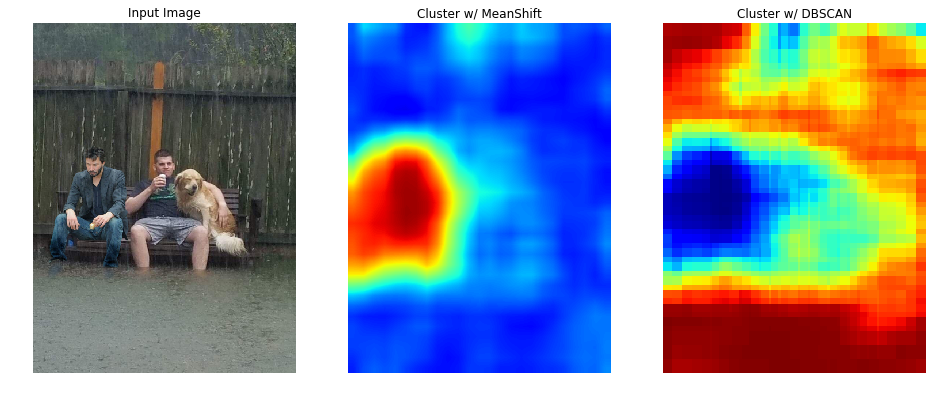

In [5]:
% matplotlib inline
plt.subplots(figsize=(16, 8))
plt.subplot(1, 3, 1)
plt.title('Input Image')
plt.imshow(im1)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Cluster w/ MeanShift')
plt.axis('off')
plt.imshow(1.0 - res1, cmap='jet', vmin=0.0, vmax=1.0)

plt.subplot(1, 3, 3)
plt.title('Cluster w/ DBSCAN')
plt.axis('off')
plt.imshow(res2, cmap='jet', vmin=0.0, vmax=1.0)

plt.show()

In [ ]:
# ckpt_path = './ckpt/exif_final/exif_final.ckpt'
# exif_demo = Demo(ckpt_path=ckpt_path, use_gpu=1, quality=3.0, num_per_dim=30)

images_path = './images/'
results_path = './results/'
        
# Need to run multipe images
for file_path in os.listdir(images_path):
    image_path = os.path.join(images_path, file_path)
    # results_path = os.path.join(cfg.results_path, file)

    imid = image_path.split('/')[-1].split('.')[0]
    save_path = os.path.join(results_path, imid + '_result.png')


    print('Running image %s' % image_path)
    
    ms_st = time.time()
    im_path = image_path
    im, res = exif_demo(im_path, dense=True)
    print('MeanShift run time: %.3f' % (time.time() - ms_st))

    plt.subplots(figsize=(16, 8))
    plt.subplot(1, 3, 1)
    plt.title('Input Image')
    plt.imshow(im)
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.title('Cluster w/ MeanShift')
    plt.axis('off')
    if np.mean(res > 0.5) > 0.5:
        res = 1.0 - res
    plt.imshow(res, cmap='jet', vmin=0.0, vmax=1.0)
    plt.savefig(save_path)
    print('Result saved %s' % save_path)

Running image ./images/1002429709383172097.jpg


## Normalized Cuts
While running the dense version, the algorithm produces a dense affinity which can be used in popular spectral clustering methods. The following code runs both the clustering with MeanShift and segmentation with N-Cuts.

/usr/local/lib/python2.7/dist-packages/sklearn/utils/validation.py:640: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  warnings.warn("Array is not symmetric, and will be converted "


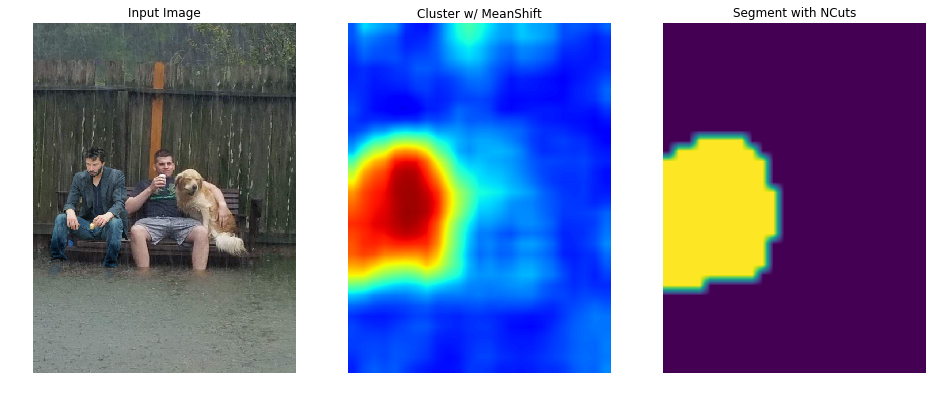

In [7]:
res = exif_demo.run(im1, use_ncuts=True, blue_high=True)

% matplotlib inline
plt.subplots(figsize=(16, 8))
plt.subplot(1, 3, 1)
plt.title('Input Image')
plt.imshow(im1)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Cluster w/ MeanShift')
plt.axis('off')
plt.imshow(res[0], cmap='jet', vmin=0.0, vmax=1.0)

plt.subplot(1, 3, 3)
plt.title('Segment with NCuts')
plt.axis('off')
plt.imshow(res[1], vmin=0.0, vmax=1.0)

plt.show()